# Project 1 - Finance - Predictive Analysis 

## PROBLEM STATEMENT:

#### - Supervised Machine Learning: 
Build a predictive model to identify whether a customer will default or not based on historical loan data.

#### - Unsupervised Machine Learning:
Identify clusters of customers with similar characteristics to uncover patterns in loan behaviour.


## RESEARCH OBJECTIVE:

##### The goal is to:
- Accurately classify borrowers into two categories:
1. Defaulter: Customers likely to default on loans.
2. Non-defaulter: Customers likely to repay their loans.

- Identify customer segments through clustering.

##### This will help with risk assessment and better loan approval decisions.

## DATA UNDERSTANDING AND PREPARATION:

### 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load dataset

In [2]:
# Load the dataset

file_path = 'loan.csv'
loan_data = pd.read_csv(file_path)

print(loan_data.head())

     customer_id     loan_id      loan_type  loan_amount  interest_rate  \
0  CUST-00004912  LN00004170       Car Loan        16795       0.051852   
1  CUST-00004194  LN00002413  Personal Loan         1860       0.089296   
2  CUST-00003610  LN00000024  Personal Loan        77820       0.070470   
3  CUST-00001895  LN00001742       Car Loan        55886       0.062155   
4  CUST-00003782  LN00003161      Home Loan         7265       0.070635   

   loan_term employment_type income_level  credit_score  gender  \
0         15   Self-employed       Medium           833    Male   
1         56       Full-time       Medium           776  Female   
2         51       Full-time          Low           697    Male   
3         30       Full-time          Low           795  Female   
4         48       Part-time          Low           519  Female   

  marital_status education_level application_date approval_date  \
0         Single          Master       05-04-2018    23-04-2018   
1        Mar

### 3. Check data structure

In [3]:
# Check data structure
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

### 4. Explore the data 

#### A. Data Understanding and EDA (Exploratory Data Analysis):

- Statistical Summary
- Identify missing or inconsistent data (though none are evident at first glance).
- Analyze the distribution of each feature and the target variable.
- Visualize correlations and check for outliers.
- Handle categorical and date variables.

In [4]:
# Statistical summary

loan_data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [5]:
# Check for missing values

loan_data.isnull().any()
#loan_data.isnull().sum() #Alternative code to return the sum of missing values

customer_id          False
loan_id              False
loan_type            False
loan_amount          False
interest_rate        False
loan_term            False
employment_type      False
income_level         False
credit_score         False
gender               False
marital_status       False
education_level      False
application_date     False
approval_date        False
disbursement_date    False
due_date             False
default_status       False
dtype: bool

In [6]:
 # Handle missing values

# data = loan_data.fillna(data.mean()) 

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Used to disable certain category of warnings
# The warnings do not affect the functionality or correctness of my code.
# Temporary fix to declutter

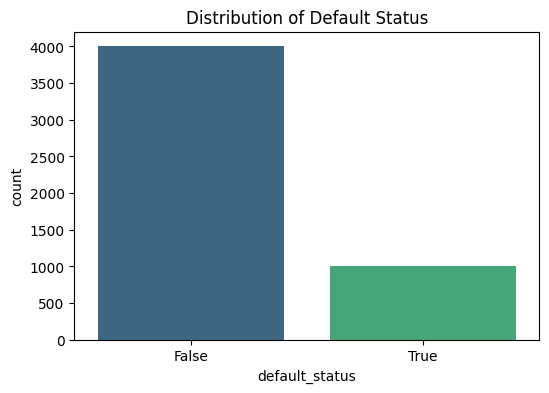

In [8]:
# Visualize the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=loan_data, x='default_status', palette='viridis') 
# Or 
# sns.countplot(data=loan_data, x='default_status', color='blue') # No FutureWarning
plt.title('Distribution of Default Status')
plt.show()

#####  Target Variable Analysis - Key Insights
- The majority of borrowers (80%) are non-defaulters, while 20% are defaulters
- The default rates are manageable, but the 20% might raise concerns for stakeholders.
- This indicates a need to analyse what factors (loan amount, loan term, interest rate or credit score) contribute to defaulting on loans.


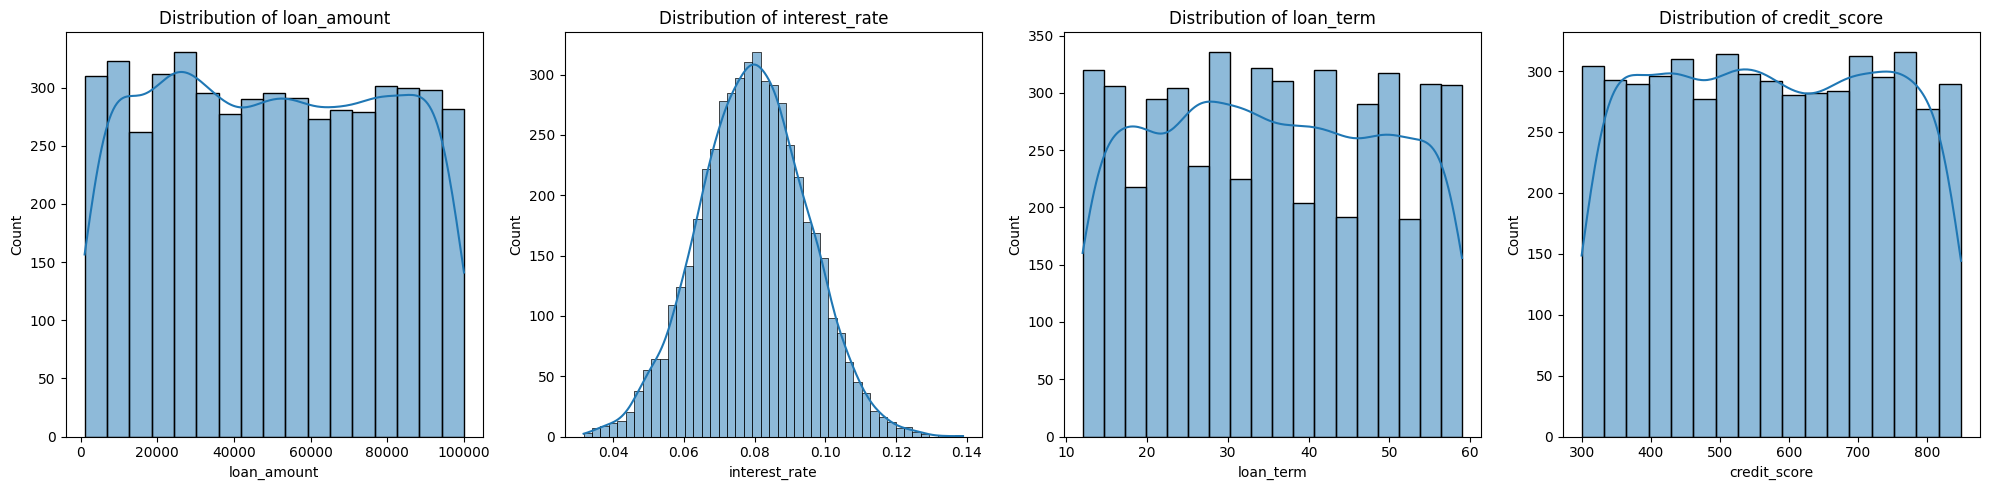

In [9]:
# Visualize distribution of numerical features
numerical_columns = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(loan_data[col], kde=True, ax=axes[i], palette='viridis')
    # Or
    # sns.histplot(loan_data[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Distribution of numeric features - Key Insights

##### Loan Amount:
- The distribution has similar frequencies and appears uniform with slight peaks.
- There's a slight drop near extremes suggesting customers are less inclined to take very small or large loans ore there may be a minimum threshold or loans are capped at $100k

##### Interest Rate:
- The interest rate distribution is bell-shaped (normal), centered around 8%, with most values falling between 6% and 10%.
- The bell-shaped distribution indicates consistent risk pricing, with most clients receiving mid-range rates. Evidently extreme rates are rare as seen by the slight tails (rates <4% or >12%).

##### Loan Term: 
- The distribution appears nearly uniform, with no clear preference except a slight rise around 30-40 months
- Borrowers are spread evenly across available loan term options, indicating flexibility in loan structuring.

##### Credit Score:
- The distribution appears uniform, with drop-offs at the lower (300-400)  and higher (750-800) ranges.
- A broad spectrum of credit scores are accomodated by the company indicating inclusivity in lending practises.
- The drop-off at the lower and higher ranges could indicate groups that are under-served due to either risk concerns or limited demand.

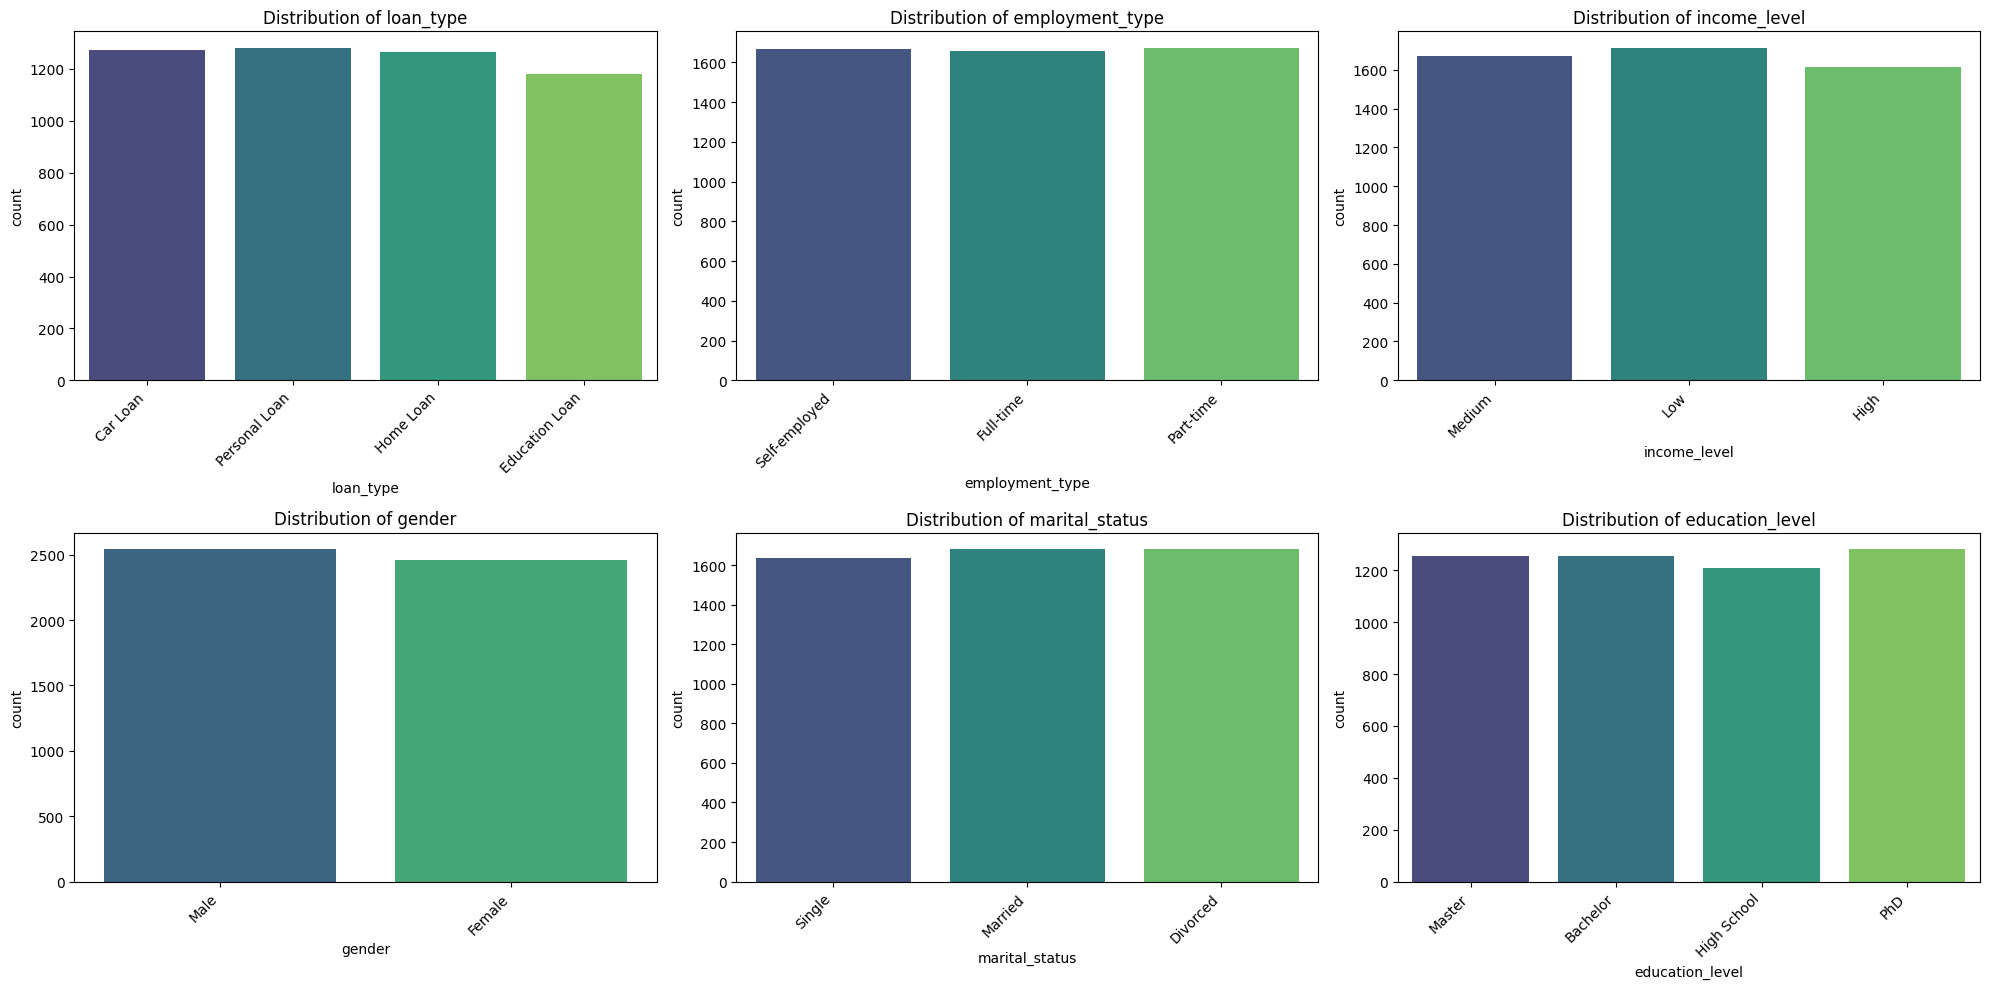

In [10]:
# Define the categorical columns
categorical_columns = ['loan_type', 'employment_type', 'income_level', 'gender', 'marital_status', 'education_level']

# Create subplots for each categorical feature
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Arrange in a grid

for i, col in enumerate(categorical_columns):
    sns.countplot(x=loan_data[col], ax=axes[i // 3, i % 3], palette='viridis')
    axes[i // 3, i % 3].set_title(f'Distribution of {col}')
    axes[i // 3, i % 3].set_xticklabels(axes[i // 3, i % 3].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:
##### Distribution of categorical features - Key insights


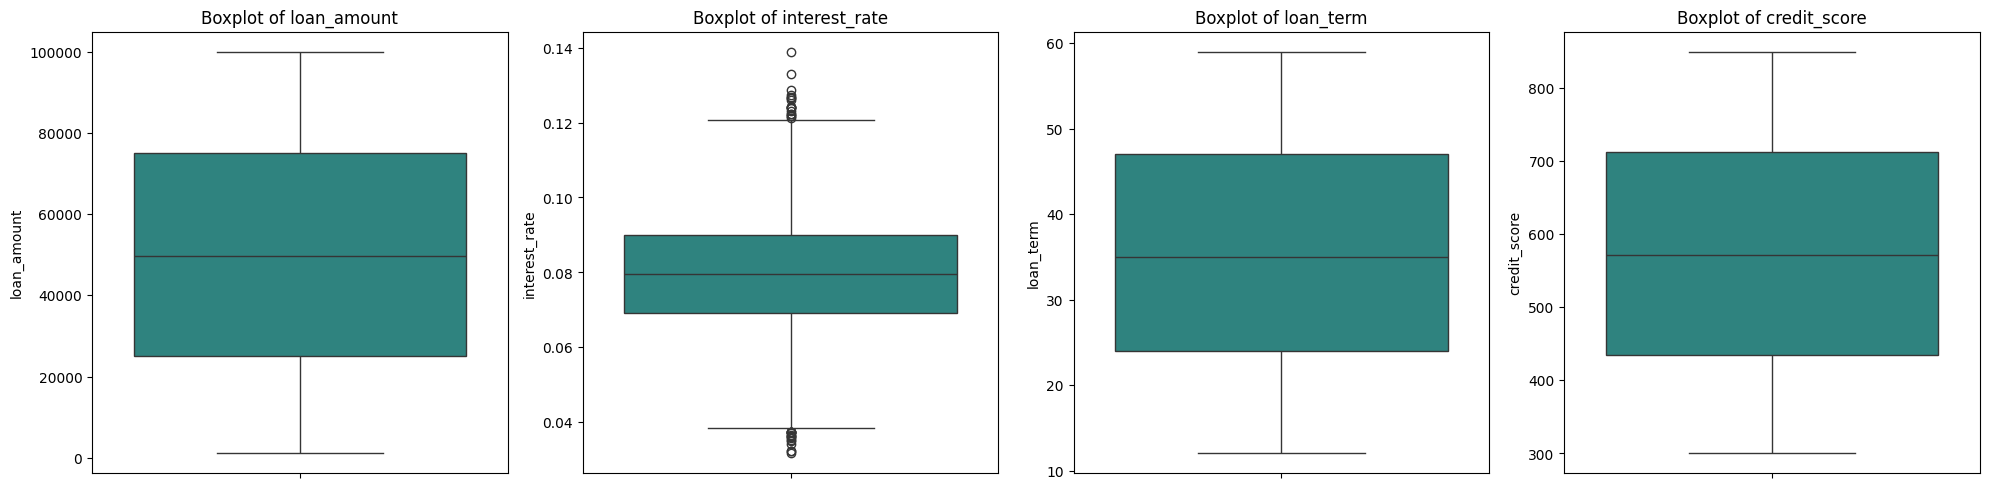

In [12]:
# Outlier detection using boxplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=loan_data[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Outlier Detection

##### Loan Amount, Loan Term and Credit Score:

There are no apparent or significant outliers and the data distribution is fairly uniform.

##### Interest Rate: 
- Several outliers are present on the higher and lower ends of the interest rates, particularly above 0.12 (12%) and below 0.04 (4%).
- The consistency of interest rates suggests standardized loan pricing and competitive rates.
- Outliers in higher ranges could signal high-risk clients, while lower rates could indicate prime clients or promotional offers.

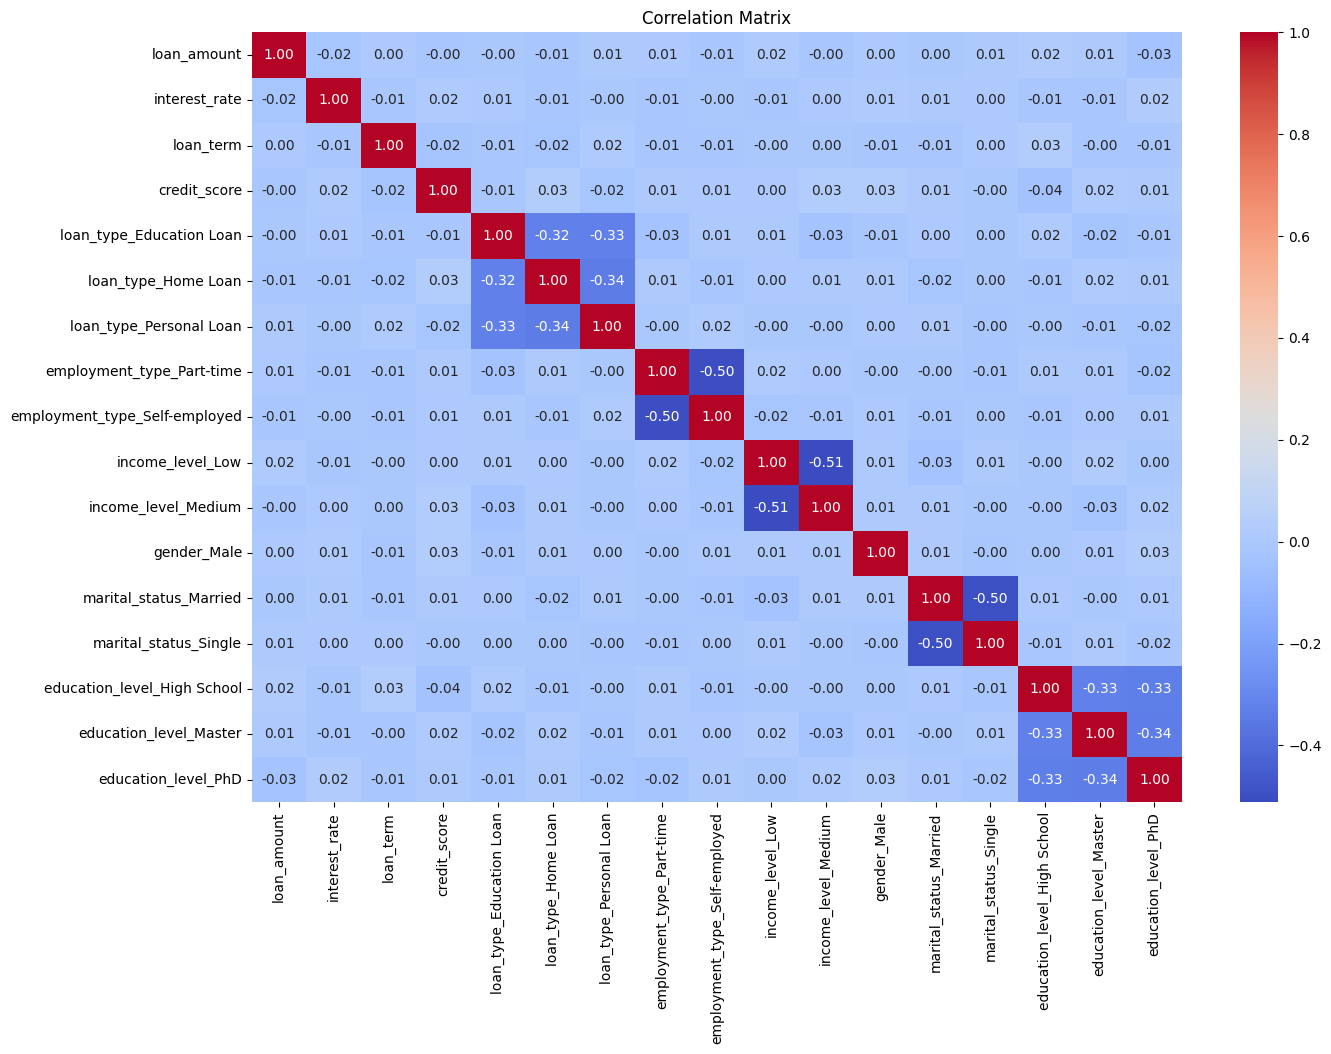

In [13]:
# Convert categorical variables to numerical format for correlation matrix
categorical_columns = ['loan_type', 'employment_type', 'income_level', 'gender', 
                       'marital_status', 'education_level']
data_encoded = pd.get_dummies(loan_data[categorical_columns], drop_first=True)
correlation_data = pd.concat([loan_data[numerical_columns], data_encoded], axis=1)
correlation_matrix = correlation_data.corr()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Correlation Matrix - Key Insights
##### Correlation Heatmap:
- Strong positive/negative correlations between numerical and encoded categorical features are limited, suggesting minimal multicollinearity.
- The mild negative correlations (-0.32 to -0.34) as seen in education levels and loan types correlations suggest a clear distinction between different education levels and that customers generally apply for one loan at a time
- The strong negative correlations (-0.50 to -0.51) as seen in employment type, income level and marital status reflects that customers are catergorized distinctly with no overlap, which is correct as customers cannot have more than one marital status for example.

#### B. Data Preprocessing:

- Encode categorical variables.
- Normalize numerical data as needed.
- Handle date columns appropriately.
- Handle outliers appropriately.

In [14]:
#Import libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    loan_data[col] = le.fit_transform(loan_data[col])
    label_encoders[col] = le

In [15]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
loan_data[numerical_columns] = scaler.fit_transform(loan_data[numerical_columns])

In [16]:
# Convert date columns to datetime format for proper handling
date_columns = ['application_date', 'approval_date', 'disbursement_date', 'due_date']
for col in date_columns:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%d-%m-%Y')

In [17]:
# Confirm preprocessing
print(loan_data.head())

     customer_id     loan_id  loan_type  loan_amount  interest_rate  \
0  CUST-00004912  LN00004170          0    -1.153786      -1.820779   
1  CUST-00004194  LN00002413          3    -1.673836       0.638046   
2  CUST-00003610  LN00000024          3     0.971160      -0.598204   
3  CUST-00001895  LN00001742          0     0.207398      -1.144195   
4  CUST-00003782  LN00003161          2    -1.485629      -0.587352   

   loan_term  employment_type  income_level  credit_score  gender  \
0  -1.469279                2             2      1.637719       1   
1   1.503649                0             2      1.278396       0   
2   1.141096                0             1      0.780386       1   
3  -0.381622                0             1      1.398170       0   
4   0.923565                1             1     -0.341710       0   

   marital_status  education_level application_date approval_date  \
0               2                2       2018-04-05    2018-04-23   
1               1   

# SUPERVISED MACHINE LEARNING MODELS

### 5. Building and Evaluating Classifier Models
- Split data into training and testing sets
- Start with classification model, such as Logistic Regression.
- Experiment with an alternative model, such as Random Forest Classifier and Decision Tree.
- Address Class Imbalance
- Evaluate and compare results and performance.

#### A. Split Data into Training and Testing Sets
Separate the dataset into features (X) and the target (y), and then split them into training and testing sets.

In [18]:
# Import libraries

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = loan_data.drop(columns=['default_status', 'customer_id', 'loan_id', 'application_date', 'approval_date', 
                       'disbursement_date', 'due_date'])  # Exclude non-predictive and redundant columns
y = loan_data['default_status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### B. Build Logististic Regression Model
We'll start with a basic classification model, such as Logistic Regression, and evaluate it using metrics like accuracy, precision, recall, and F1-score.
- Logistic regression is ideal for binary classification problems (predicting either e.g., yes/no, pass/fail) and for smaller datasets.

In [19]:
# Import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89       800
        True       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000

Confusion Matrix:
 [[800   0]
 [200   0]]
Accuracy Score: 0.8


#### C. Build Random Forest Classifier Model
We'll experiment with an additional model like Random Forest and evaluate it using metrics like accuracy, precision, recall, and F1-score.
- Random Forest is ideal for complex classification, feature importance analysis and can handle mixed-type datasets.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89       800
        True       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000

Random Forest Accuracy Score: 0.799
Confusion Matrix:
 [[799   1]
 [200   0]]
Accuracy Score: 0.799


#### Feature Importance
For tree-based models like Random Forest, analyze feature importance to understand which variables significantly influence predictions.

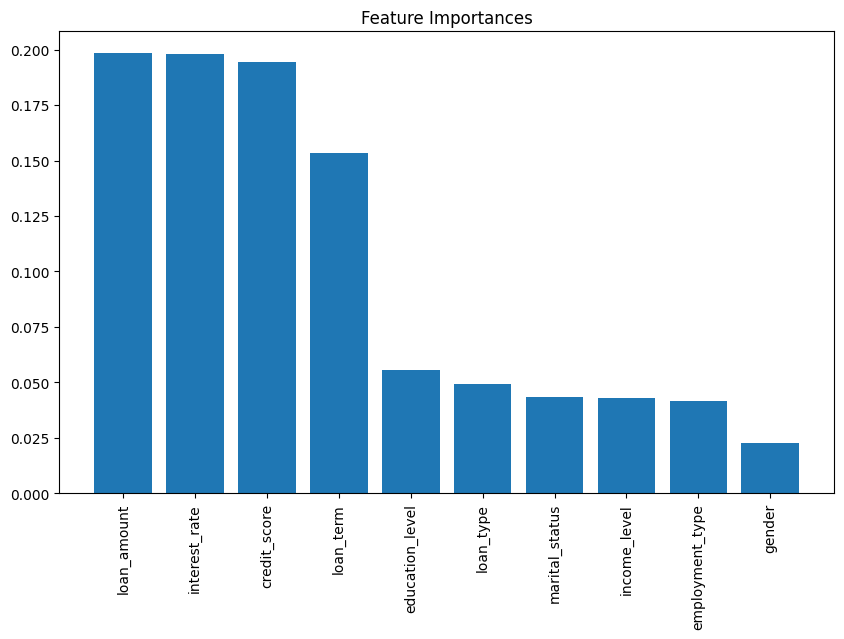

In [21]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()

#### D. Build Decision Tree Classifier Model
We'll experiment with an additional model - the Decision Tree Classifier and evaluate it using metrics like accuracy, precision, recall, and F1-score.
- Decision Tree is ideal for classification problems, easy interpretability and it automatically detects and models feature interaction.

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Initialize and train model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
decision_tree.fit(X_train, y_train)

# Evaluate the Model
y_pred = decision_tree.predict(X_test)

# Print Accuracy, Classification Report, and Confusion Matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Visualize the Decision Tree
# Print the decision tree rules
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.99      0.89       800
        True       0.29      0.01      0.02       200

    accuracy                           0.80      1000
   macro avg       0.54      0.50      0.45      1000
weighted avg       0.70      0.80      0.71      1000


Confusion Matrix:
 [[795   5]
 [198   2]]
Accuracy: 0.797

Decision Tree Rules:
 |--- interest_rate <= 0.10
|   |--- credit_score <= -1.70
|   |   |--- interest_rate <= -1.15
|   |   |   |--- class: False
|   |   |--- interest_rate >  -1.15
|   |   |   |--- education_level <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- education_level >  0.50
|   |   |   |   |--- class: True
|   |--- credit_score >  -1.70
|   |   |--- credit_score <= 0.72
|   |   |   |--- credit_score <= 0.71
|   |   |   |   |--- interest_rate <= -0.37
|   |   |   |   |   |--- class: False
|   |   |   |   |--- interest_rate >  -0.37
|   |   |   |   |   |--- cla

#### E. Build Gradient Boosting Model
We'll experiment with an additional model - the Gradient Boosting Model and evaluate it using metrics like accuracy, precision, recall, and F1-score.

Gradient Boosting is good for its high predictive accuracy and can effectively deal with class imbalances using appropriate loss functions.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Gradient Boosting with default parameters
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Print Evaluation Results
print("\nGradient Boosting Model Evaluation:")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Model Evaluation:

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.99      0.89       800
        True       0.14      0.01      0.01       200

    accuracy                           0.80      1000
   macro avg       0.47      0.50      0.45      1000
weighted avg       0.67      0.80      0.71      1000


Confusion Matrix:
 [[794   6]
 [199   1]]
Accuracy: 0.795


#### F. Address Class Imbalance
As default_status is imbalanced (as observed earlier), we will use the SMOTE technique to make adjustments to the minority class.

In [24]:
# Import libraries
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [25]:
from collections import Counter

# Before SMOTE

print("Before Balancing:")
print(y_train.value_counts())
# OR print("Class distribution before SMOTE:", Counter(y_train))

# After SMOTE
print("\nAfter Balancing:")
print(pd.Series(y_resampled).value_counts())
# OR print("Class distribution after SMOTE:", Counter(y_resampled))

Before Balancing:
default_status
False    3201
True      799
Name: count, dtype: int64

After Balancing:
default_status
False    3201
True     3201
Name: count, dtype: int64


In [45]:
# Train the Logistic Regression model on the balanced dataset
log_model = LogisticRegression(random_state=42)
log_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_balanced = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression (Balanced Data):")
print("Accuracy Score:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Logistic Regression (Balanced Data):
Accuracy Score: 0.508
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.53      0.63       800
        True       0.18      0.42      0.25       200

    accuracy                           0.51      1000
   macro avg       0.48      0.47      0.44      1000
weighted avg       0.66      0.51      0.56      1000

Confusion Matrix:
 [[424 376]
 [116  84]]


In [44]:
# Train the Random Forest model on the balanced dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf_balanced = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest (Balanced Data):")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))


Random Forest (Balanced Data):
Accuracy Score: 0.688
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.83      0.81       800
        True       0.16      0.13      0.14       200

    accuracy                           0.69      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.67      0.69      0.68      1000

Confusion Matrix:
 [[662 138]
 [174  26]]


In [28]:
# Train the Decision Tree model on the balanced dataset
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
decision_tree.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_balanced_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree (Balanced Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced_tree))

# Print the decision tree rules
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("\nDecision Tree Rules (Balanced Data):\n", tree_rules)

Decision Tree (Balanced Data):
Accuracy: 0.324

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.21      0.33       800
        True       0.20      0.77      0.31       200

    accuracy                           0.32      1000
   macro avg       0.49      0.49      0.32      1000
weighted avg       0.67      0.32      0.33      1000


Confusion Matrix:
 [[170 630]
 [ 46 154]]

Decision Tree Rules (Balanced Data):
 |--- credit_score <= 1.54
|   |--- loan_type <= 0.50
|   |   |--- loan_term <= 1.36
|   |   |   |--- loan_amount <= 1.57
|   |   |   |   |--- loan_term <= -1.18
|   |   |   |   |   |--- class: True
|   |   |   |   |--- loan_term >  -1.18
|   |   |   |   |   |--- class: True
|   |   |   |--- loan_amount >  1.57
|   |   |   |   |--- income_level <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- income_level >  0.50
|   |   |   |   |   |--- class: False
|   |   |--- loan_term >  1.36
|   |   |   |--- 

In [43]:
# Train Gradient Boosting on balanced dataset.
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_balanced_gb = gb_model.predict(X_test)

# Print Evaluation Results
print("\nGradient Boosting (Balanced Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced_gb))


Gradient Boosting (Balanced Data):
Accuracy: 0.583

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.64      0.71       800
        True       0.20      0.36      0.26       200

    accuracy                           0.58      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.68      0.58      0.62      1000


Confusion Matrix:
 [[510 290]
 [127  73]]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate metrics
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }

# Metrics for Logistic Regression
log_metrics_before = get_metrics(y_test, y_pred)  # Before SMOTE
log_metrics_after = get_metrics(y_test, y_pred_balanced)  # After SMOTE

# Metrics for Random Forest
rf_metrics_before = get_metrics(y_test, y_pred)  # Before SMOTE
rf_metrics_after = get_metrics(y_test, y_pred_rf_balanced)  # After SMOTE 

# Metrics for Decision Tree 
dt_metrics_before = get_metrics(y_test, y_pred)  # Before SMOTE
dt_metrics_after = get_metrics(y_test, y_pred_balanced_tree)  # After SMOTE

#Metrics for Gradient Boosting Model
gb_metrics_before = get_metrics(y_test, y_pred) #Before SMOTE
gb_metrics_after = get_metrics(y_test, y_pred_balanced_gb) #After SMOTE

# Combine all results into a single dictionary
results = {
    "Logistic Regression (Before SMOTE)": log_metrics_before,
    "Logistic Regression (After SMOTE)": log_metrics_after,
    "Random Forest (Before SMOTE)": rf_metrics_before,
    "Random Forest (After SMOTE)": rf_metrics_after,
    "Decision Tree (Before SMOTE)": dt_metrics_before,
    "Decision Tree (After SMOTE)": dt_metrics_after,
    "Gradient Boosting (Before SMOTE)": gb_metrics_before,
    "Gradient Boosting (After SMOTE)": gb_metrics_after
}

In [40]:
# Convert results to DataFrame
comparison_table = pd.DataFrame(results).T  # Transpose for better readability

# Display the table
print("Comparison Results Table:")
print(comparison_table)


Comparison Results Table:
                                    Accuracy  Precision  Recall  F1-Score
Logistic Regression (Before SMOTE)     0.797   0.285714   0.010  0.019324
Logistic Regression (After SMOTE)      0.508   0.182609   0.420  0.254545
Random Forest (Before SMOTE)           0.797   0.285714   0.010  0.019324
Random Forest (After SMOTE)            0.688   0.158537   0.130  0.142857
Decision Tree (Before SMOTE)           0.797   0.285714   0.010  0.019324
Decision Tree (After SMOTE)            0.324   0.196429   0.770  0.313008
Gradient Boosting (Before SMOTE)       0.797   0.285714   0.010  0.019324
Gradient Boosting (After SMOTE)        0.583   0.201102   0.365  0.259325


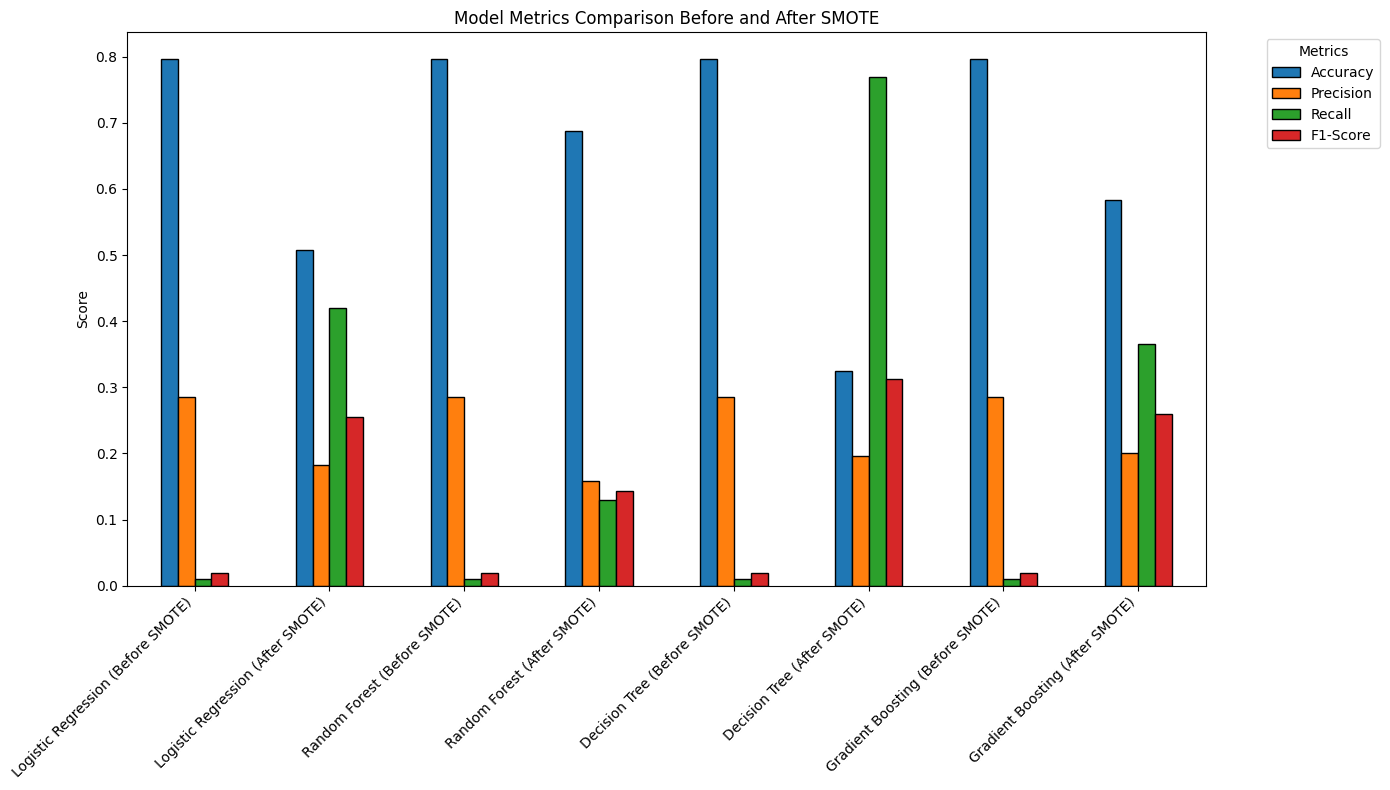

In [41]:
# Visualize the comparison
comparison_table.plot(kind='bar', figsize=(14, 8), edgecolor='black')
plt.title("Model Metrics Comparison Before and After SMOTE")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### SMOTE Technique Outputs - Key Insights
1. Impact of SMOTE on Precision, Recall, and F1-Score:
- Before SMOTE:
  
Precision, Recall, and F1-Scores are notably low for all models, indicating poor handling of the minority class as all models tend to predict more of the majority class due to the imbalance in the dataset.

- After SMOTE:
  
Recall improves significantly across all models, showing better detection of the minority class after balancing.
F1-Score also increases for all models, reflecting improved balance between Precision and Recall.

2. Accuracy Trends:
   
- Before SMOTE:
  
Accuracy is consistently high across models before SMOTE because the models prioritize the majority class.

- After SMOTE:

The Accuracy metric remains stable or slightly decreases, indicating a trade-off as the model learns to balance predictions for both classes.

# UNSUPERVISED MACHINE LEARNING MODELS
### 6. Use K-Means to cluster similar customers 

In [33]:
# Import libraries
from sklearn.cluster import KMeans

# Drop non-numeric or irrelevant columns (e.g., IDs, target variables)
feature_column = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']  
X = loan_data[feature_column]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply clustering:
kmeans = KMeans(n_clusters=3, random_state=42)
loan_data['cluster'] = kmeans.fit_predict(X)

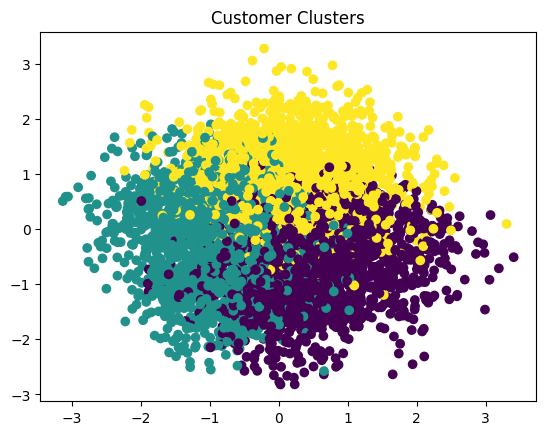

In [34]:
# Import libraries
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=loan_data['cluster'])
plt.title("Customer Clusters")
plt.show()

#### Key Insights from K-Means Clustering
##### - Number of Clusters:
The K-Means algorithm successfully divided the dataset into 3 distinct clusters based on the selected numeric features (loan_amount, interest_rate, loan_term, credit_score).

##### - Cluster Distribution:
The clusters appear well-distributed in the PCA-transformed 2D space. This suggests that the data points have distinct characteristics that allow separation into meaningful groups.

In [46]:
# Calculate the average values of features for each cluster in the dataset
cluster_profiles = loan_data.groupby('cluster')[feature_column].mean()
print(cluster_profiles)

         loan_amount  interest_rate  loan_term  credit_score
cluster                                                     
0          -1.015367       0.073286  -0.236046      0.128032
1           0.385891      -0.121020   1.031304     -0.212526
2           0.791854       0.040462  -0.802463      0.071843


In [47]:
# Calculate the average default rate for each cluster
cluster_default_rates = loan_data.groupby('cluster')['default_status'].mean()
print(cluster_default_rates)

cluster
0    0.202081
1    0.196429
2    0.200645
Name: default_status, dtype: float64


#### Key Insights from Cluster Profile Analysis
##### Cluster Profiles
- Cluster 0 (Lower Loan Term, Medium Interest Rate):

Customers in this cluster typically have shorter loan terms and medium-to-high interest rates.
Their loan amounts are slightly below average, while credit scores are close to average.
Default Rate: 20.28% of customers in this group default on their loans, making it an average-risk group.

- Cluster 1 (Higher Loan Amount, Lower Interest Rate):

This group consists of customers with higher loan amounts and low interest rates.
Their loan terms are around average, but their credit scores are slightly below average.
Default Rate: 19.29%, the lowest among the clusters, indicating this group is the most stable and reliable.

- Cluster 2 (Longer Loan Term, High Interest Rate):

Customers here typically have longer loan terms and high interest rates.
Their loan amounts are slightly below average, and credit scores are close to average.
Default Rate: 20.31%, the highest among the clusters, suggesting that this group is slightly riskier compared to others.

# RESULTS AND KEY INSIGHTS

### Best Model:

Based on the metrics, the Decision Tree (After SMOTE) appears to be the best-performing model, achieving the highest recall (0.770) and a balanced F1-score (0.313008). This indicates it is the most effective at identifying loan defaults, even in the imbalanced dataset scenario.

### Key Insights
#### 1. Logistic Regression: 
Performs poorly in both pre-SMOTE and post-SMOTE scenarios due to its linear nature, which struggles with complex decision boundaries.
#### 2. Random Forest: 
Shows moderate improvement after SMOTE but has limitations in recall, indicating it may not handle imbalanced data as effectively as other models.
#### 3. Decision Tree: 
Exhibits the best recall after SMOTE, highlighting its ability to adapt to imbalanced datasets.
#### 4. Gradient Boosting: 
Balances precision and recall reasonably well but does not outperform Decision Tree on recall or F1-score.

# RECOMMENDATIONS

#### A. Feature Investments:
Focus on collecting and engineering high-quality features such as repayment history and employment details to improve predictive performance.
#### B. Continuous Monitoring:
Regularly monitor the model's performance and retrain it with new data to ensure accuracy and relevance over time.
#### C. Threshold Tuning:
Fine-tune the decision threshold based on business needs, balancing between precision (avoiding false positives) and recall (catching true defaulters).